# Reprojecting rasters

## GeoTIFF

Reproject a single GeoTIFF file. This snippet borrows from the example provided by the `rasterio` docs [here](https://rasterio.readthedocs.io/en/latest/topics/reproject.html).

In [1]:
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = "EPSG:4326"

fp = "data/tas_mean_C_ar5_5ModelAvg_rcp85_01_2006.tif"
out_fp = "scratch/tas_mean_C_ar5_5ModelAvg_rcp85_01_2006.tif"

with rio.open(fp) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height
    })
    
    with rio.open(out_fp, "w", **kwargs) as dst:
        reproject(
            source=rio.band(src, 1),
            destination=rio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest
        )

We can plot the rasters to show that the transform worked.

Original GeoTIFF:

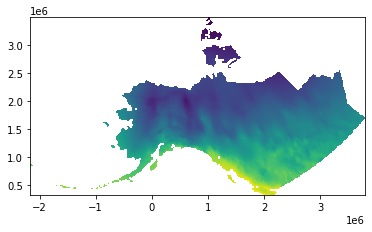

In [2]:
from rasterio.plot import show

with rio.open(fp) as src:
    show(src)

Newly reprojected GeoTIFF:

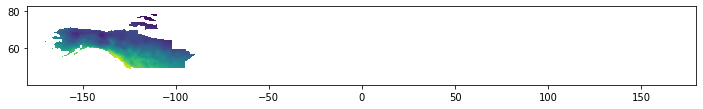

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12, 4))

with rio.open(out_fp) as src:
    show(src, ax=ax)

The reprojection can also output the array to memory as well, instead of writing a new file:

In [4]:
import numpy as np

with rio.open(fp) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height
    })
    
    in_arr = src.read(1)
    out_arr = np.zeros_like(in_arr)
    reproject(
        source=in_arr,
        destination=out_arr,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest
    )

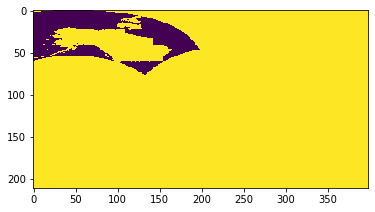

In [5]:
plt.imshow(out_arr, interpolation="none")